# Functions

## Loading Packages

In [1]:
using Roots

using Compat, Missings        #in Julia 0.6 
#using Dates                  #in Julia 0.7

include("printmat.jl")   #a function for prettier matrix printing

printlnPs (generic function with 2 methods)

In [2]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(600,400))
end

Plots.GRBackend()

## A Function with a Scalar Input and a Scalar Output

The function below takes a scalar as input and produces a scalar as output.

In [3]:
function fn1(x)
    b = 2                    #only seen inside function  
    y = b*(x-1.1)^2 - 0.5
    return y
end

fn1 (generic function with 1 method)

In [4]:
y = fn1(1)                   #calling on the function
printlnPs("result from calling fn1(1): ",y)

result from calling fn1(1):     -0.480


## Elementwise Evaluation

To apply the function to each element of an array, use the dot syntax: 
```
y = fn1.(x)
```

Alternatively, write a loop or perhaps a function that directly supports elementwise operations on arrays like
```
y = 2*(x.-1.1).^2 .- 0.5      # .- and .^2 means that x could be an array 
```

In [5]:
x = [1;1.5] 

y = fn1.(x)                   
println("result from calling fn1.(x): ")
printmat(y)

println("fn1.(x) evaluates fn1(x[i,j]) for each element x[i,j]")

result from calling fn1.(x): 
    -0.480
    -0.180

fn1.(x) evaluates fn1(x[i,j]) for each element x[i,j]


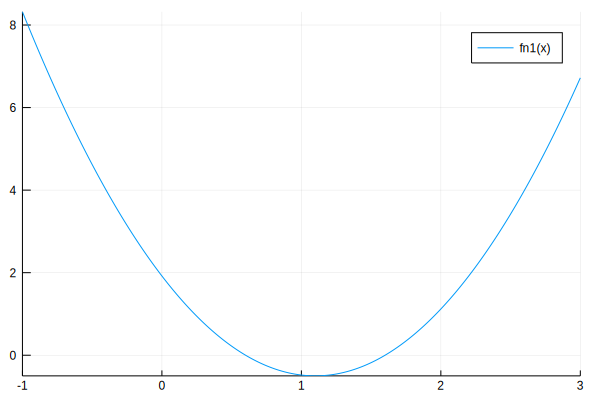

In [6]:
x2 = -1:0.01:3                        

plot(x2,fn1.(x2),label="fn1(x)")           #plotting the function

## A "one-liner"

We can also create a short version of a function as in the cell below. Notice, however, that it can (essentially) only contain one expression.

In [7]:
fn1b(x) = 2*(x-1.1)^2 - 0.5          #short form of a function

fn1b (generic function with 1 method)

In [8]:
y = fn1b.(x)                 
println("result from the function fn1b.(x): ")
printmat(y)

result from the function fn1b.(x): 
    -0.480
    -0.180



## Several Inputs

It is straightforward to define functions with several inputs. You can also specify default values of the inputs. They are used when you do not supply those inputs when calling on the function. (Clearly, inputs with default values must be towards the end of the list of inputs.)

In [9]:
function fn2a(x,b)
    y = b*(x-1.1)^2 - 0.5
    return y
end

function fn2(x,b=1)                 #b=1 is the default in case we call as fn2(x)
    y = b*(x-1.1)^2 - 0.5
    return y
end

fn2 (generic function with 2 methods)

In [10]:
printlnPs("result from the fn2a(1,1) and fn2(1): ",fn2a(1,1),fn2(1))

y2b = fn2.(x,2)
println("\nresult from the function fn2.(x,2): ")
printmat(y2b)

result from the fn2a(1,1) and fn2(1):     -0.490    -0.490

result from the function fn2.(x,2): 
    -0.480
    -0.180



## Several Inputs 2: Keyword Arguments

You can also define functions that take *keyword arguments* like in `fn2b(x;b=0,c=5)`. Notice the semi-colon (;). 

In this case, you call on the function by `fn2b(x,b=1,b=1)`. This helps remembering/interpreting what the arguments represent. You can also pass the keyword arguments in any order and you could use comma (,) instead of semi-colon (;).

In [11]:
function fn2b(x;b=1,c=0.5)
    y = b*(x-1.1)^2 - c
    return y
end

fn2b (generic function with 1 method)

In [12]:
printlnPs("result from the fn2b(1,c=0.5,b=1): ",fn2b(1,c=0.5,b=1))  

println("notice that you can pass the keyword arguments in any order")

result from the fn2b(1,c=0.5,b=1):     -0.490
notice that you can pass the keyword arguments in any order


## An "Anonymous" Function

The expression 
```
x->2*(x-1.1)^2 - 0.5
```
creates an anonymous function (a function without a name). 

This approach is often useful as an input to another function. For instance, the next cell uses
```
x->fn2a(x,2)
```
This creates an anonymous function with only one input (```x```), which is what the root finding routine ```fzero()``` wants.

In [13]:
x1 = fzero(x->fn2a(x,2),[-1;1])          #finding a root of a function      
                                         #[-1;1] searches roots in this interval
printlnPs("A root at: ",x1)

x2 = fzero(x->fn2a(x,2)-0.75,2)           #at which x is fn(x,2) == 0.75? Starting guess: x=2
                                        
printlnPs("\n","fn2a(x,2)=0.75 at ",x2,",    testing: ",fn2a(x2,2))

A root at:      0.600

fn2a(x,2)=0.75 at      1.891,    testing:      0.750


## Several Outputs

Functions can produce a "tuple" like `(y1,y2,y3)` as outputs.

In case you only want the first two outputs, call as `(y1,y2,) = fn(x)`.

Instead, if you only want the 2nd and third outputs, call as `(_,y2,y3) = fn(x)`

You can also extract the second output as `y2 = fn(x)[2]`

In [14]:
function fn3(x,b=1)                 
    y1 = b*(x-1.1)^2 - 0.5
    y2 = b*x
    y3 = 3
    return y1, y2, y3
end

fn3 (generic function with 2 methods)

In [15]:
(y1,y2,) = fn3(1,2)
println("The first 2 outputs from the function fn3(1,2): ")
printmat([y1 y2])

y2 = fn3(1,2)[2]         #to grab just the second output from the function
printlnPs("The result from calling fn3(1,2)[2]: ",y2)

The first 2 outputs from the function fn3(1,2): 
    -0.480     2.000

The result from calling fn3(1,2)[2]:          2


## Elementwise Evaluation with Several Outputs (extra)

...can be tricky, because you get an array (same dimension as the input) of tuples instead of a tuple of arrays (which is probably what you want).

In this case, it might be easier to either loop over the function calls, or to write the function so that it can directly handle array inputs (without the dot), see `fn3b()`.

In [16]:
function fn3b(x,b=1)                 #x can be an array
    y1 = b*(x.-1.1).^2 .- 0.5
    y2 = b*x
    y3 = 3
    return y1, y2, y3
end

fn3b (generic function with 2 methods)

In [17]:
(y1,y2,) = fn3b(x,2)                                  #function written to handle arrays
println("result from the function fn3b(x,2): ")
printmat([y1 y2])

result from the function fn3b(x,2): 
    -0.480     2.000
    -0.180     3.000



## Documenting Your Function 

To use Julia's help function (`? FunctionName`), put the documentation in triple quotes, just above the function defintiion. The cell below illustrates a simple case.

In [18]:
"""
    fn4(x,b=1)

Calculate b*(x-1.1)^2 - 0.5.

# Arguments
- `x`:    a number
- `b`:    a number

"""
function fn4(x,b=1)       
    y = b*(x-1.1)^2 - 0.5
    return y
end

fn4

In [19]:
? fn4

search:



```
fn4(x,b=1)
```

Calculate b*(x-1.1)^2 - 0.5.

# Arguments

  * `x`:    a number
  * `b`:    a number
